In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

import os

import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
x_train = []
for i, (r, d, f) in enumerate(os.walk('C:/Users/Celia LAGARDE RAMORA/Desktop/Train/')):
    for f in f:
        i = Image.open(os.path.join(r, f))
        i = i.resize((24, 24), Image.ANTIALIAS)
        i.save(os.path.join(r, f))
        x_train.append(np.array(i))

In [3]:
x_test = []
for i, (r, d, f) in enumerate(os.walk('C:/Users/Celia LAGARDE RAMORA/Desktop/Test/')):
    for f in f:
        i = Image.open(os.path.join(r, f))
        i = i.resize((24, 24), Image.ANTIALIAS)
        i.save(os.path.join(r, f))
        x_test.append(np.array(i))

In [ ]:
print(x_train)

In [4]:
x_train = np.array(x_train) / 255.

In [ ]:
x_train.shape

In [5]:
x_test = np.array(x_test) / 255.

In [ ]:
print(x_train.shape)

In [ ]:
#x_train = x_train.reshape((len(x_train), -1))
#x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = 0.2,
    fill_mode = 'constant'
)

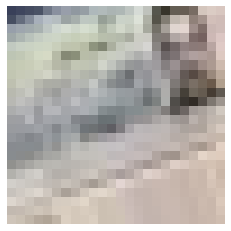

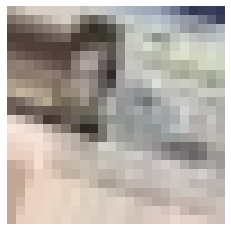

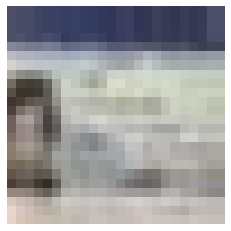

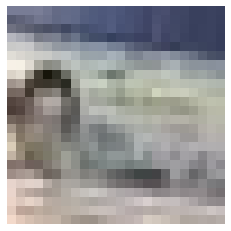

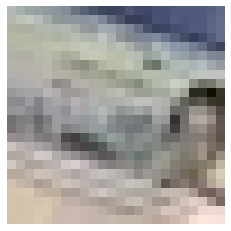

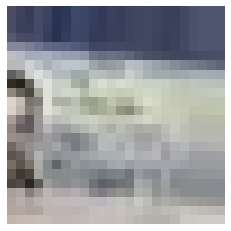

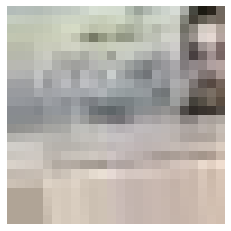

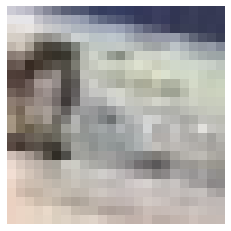

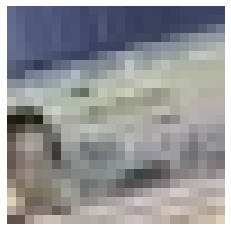

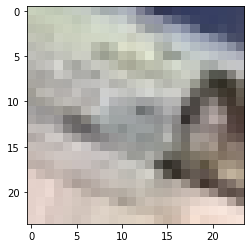

In [7]:
i = 0

for output_batch in datagen.flow(x_train, batch_size=32, shuffle=True, save_to_dir='C:/Users/Celia LAGARDE RAMORA/Desktop/Train/'):
    plt.figure()
    imgplot = plt.imshow(np.array(output_batch[0]))
    i+= 1
    
    if i==10:
        break
    plt.axis("off")
    plt.show()        

In [ ]:
input = Input(shape=(x_train.reshape(-1, 24, 24, 3).shape[1:]))

_ = Conv2D(576, (3, 3), activation=keras.activations.relu)(input)
_ = MaxPooling2D((2, 2))(_)
_ = Conv2D(256, (3, 3), activation=keras.activations.relu)(_)
_ = MaxPooling2D((2, 2))(_)
_ = Conv2D(128, (3, 3), activation=keras.activations.relu)(_)
_ = UpSampling2D((3, 3))(_)
_ = Conv2D(256, (2, 2), activation=keras.activations.relu)(_)
_ = UpSampling2D((3, 3))(_)
_ = Conv2D(576, (3, 3), activation=keras.activations.relu)(_)
_ = UpSampling2D((2, 2))(_)

output = Conv2D(3, (3, 3), activation=keras.activations.sigmoid)(_)


model = Model(inputs=input, outputs=output)
model.compile(optimizer=Adam(.001), loss='mse')

print(model.summary())

In [ ]:
from keras.callbacks import ModelCheckpoint
import datetime

dnow = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
res = 'CAE_'
mc = ModelCheckpoint('{val_loss:.6f}_'+ res + dnow + '.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


hist = model.fit(x_train, x_train, epochs=10, batch_size=10, shuffle=True, validation_data=(x_test, x_test), callbacks=[mc])